# WeatherPy
----

Analysis
1. In the Southern Hempishere, the closer to the equator you are (0°), the hotter the temperature. However in the Northern Hempisphere, the warmer temperatures occur at 30°-40° latitude. That is where California falls, so I can attest to July being the hot season. 
2. Cities within latitudes -35°-60° had the highest humidity. There wasn't much difference between hemispheres, both have humidity increase as the temperature rises, but being the most humid in cities closest to 0°.
3. There wasn't a strong correlation between either wind speed and latitutde or cloudiness and latitude. The similarity they both share is that cities closest to the equator are more cloudy and windy. 

In [1]:
#pip install citipy

In [2]:
#pip install scipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
#import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Instructions/output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + record

In [6]:
# # Get weather data in order to see JSON object
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # Convert to dataframe
# city_weather_df=pd.DataFrame(weather_response)

# # Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")

In [7]:
print(f"Beginning Data Retrieval")
print("-----------------------------")

record_counter=0
set_counter=1

# List to hold city dictionaries
city_list=[]
# 
for city in cities:
    if record_counter==50:
        set_counter+=1
        record_counter=0
    # Build query URL & request temps in F
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    record_counter+=1
    try: 
        city_response=requests.get(query_url)
        city_data=city_response.json()
        city_maxtemp=city_data["main"]["temp_max"]
        city_humidity=city_data["main"]["humidity"]
        city_cloudiness=city_data["clouds"]["all"]
        city_windspeed=city_data["wind"]["speed"]
        city_country=city_data["sys"]["country"]
        city_date=city_data["dt"]
        city_lat=city_data["coord"]["lat"]
        city_lon=city_data["coord"]["lon"]
        # Create dictionary to hold city data
        weather_dict={"City": city,
                      "Lat": city_lat,
                      "Lon": city_lon,
                      "Max Temp": city_maxtemp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_cloudiness,
                      "Wind Speed": city_windspeed,
                      "Country": city_country,
                      "Date": city_date}
        city_list.append(weather_dict)
    except:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | hilo
Processing Record 1 of Set 1 | coihaique
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | richards bay
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | auki
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | srednekolymsk
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | copiapo
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | huarmey
Processing Record 13 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | beloha
Processing Record 20 of Set 1 | taolanaro
C

City not found. Skipping...
Processing Record 31 of Set 4 | conceicao das alagoas
Processing Record 32 of Set 4 | parana
Processing Record 33 of Set 4 | ushirombo
Processing Record 34 of Set 4 | labuhan
Processing Record 35 of Set 4 | tonantins
Processing Record 36 of Set 4 | bridlington
Processing Record 37 of Set 4 | pisco
Processing Record 38 of Set 4 | harper
Processing Record 39 of Set 4 | batticaloa
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | el faiyum
City not found. Skipping...
Processing Record 42 of Set 4 | chama
Processing Record 43 of Set 4 | mocuba
Processing Record 44 of Set 4 | suoyarvi
Processing Record 45 of Set 4 | kuandian
Processing Record 46 of Set 4 | yagoua
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | chulym
Processing Record 0 of Set 5 | luderitz
Processing Record 1 of Set 5 | meulaboh
Processing Record 2 of Set 5 | the valley
Proces

Processing Record 24 of Set 8 | kaduy
Processing Record 25 of Set 8 | neiafu
Processing Record 26 of Set 8 | zhanaozen
Processing Record 27 of Set 8 | astoria
Processing Record 28 of Set 8 | naze
Processing Record 29 of Set 8 | cidreira
Processing Record 30 of Set 8 | mizur
Processing Record 31 of Set 8 | cabo san lucas
Processing Record 32 of Set 8 | cockburn town
Processing Record 33 of Set 8 | panuco
Processing Record 34 of Set 8 | togitsu
Processing Record 35 of Set 8 | inhambane
Processing Record 36 of Set 8 | berbera
Processing Record 37 of Set 8 | nowa sol
Processing Record 38 of Set 8 | jahrom
City not found. Skipping...
Processing Record 39 of Set 8 | mrirt
City not found. Skipping...
Processing Record 40 of Set 8 | nipawin
Processing Record 41 of Set 8 | jalu
Processing Record 42 of Set 8 | gullhaug
Processing Record 43 of Set 8 | aljezur
Processing Record 44 of Set 8 | binzhou
Processing Record 45 of Set 8 | grand-santi
Processing Record 46 of Set 8 | alofi
Processing Record

Processing Record 13 of Set 12 | whitehorse
Processing Record 14 of Set 12 | payo
Processing Record 15 of Set 12 | sulina
Processing Record 16 of Set 12 | prieska
Processing Record 17 of Set 12 | paamiut
Processing Record 18 of Set 12 | kaina
Processing Record 19 of Set 12 | uthal
Processing Record 20 of Set 12 | russell
Processing Record 21 of Set 12 | prince albert
Processing Record 22 of Set 12 | alta floresta
Processing Record 23 of Set 12 | kudahuvadhoo
Processing Record 24 of Set 12 | newmarket
Processing Record 25 of Set 12 | yatou
Processing Record 26 of Set 12 | manzanillo
Processing Record 27 of Set 12 | mogadishu
Processing Record 28 of Set 12 | montepuez
Processing Record 29 of Set 12 | kailua
Processing Record 30 of Set 12 | kindu
Processing Record 31 of Set 12 | nome
Processing Record 32 of Set 12 | mananjary
Processing Record 33 of Set 12 | sheopur
Processing Record 34 of Set 12 | aban
Processing Record 35 of Set 12 | matelandia
Processing Record 36 of Set 12 | porto wal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert city_list to a new dataframe
cities_weather_df=pd.DataFrame(city_list)

# Save cities_weather_df to CSV 
cities_weather_df.to_csv("City Weather Data.csv", encoding="utf-8", index=False)

In [9]:
cities_weather_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,82.40,58,1,8.05,US,1596057323
1,coihaique,-45.58,-72.07,39.20,69,99,3.51,CL,1596057344
2,vaini,-21.20,-175.20,69.80,77,40,16.11,TO,1596057327
3,bambous virieux,-20.34,57.76,72.00,83,40,10.29,MU,1596057387
4,richards bay,-28.78,32.04,65.44,81,77,5.10,ZA,1596057449


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Sort by humidity to find if there are values >100%
cities_lowhumidity=cities_weather_df.sort_values(by=["Humidity"], ascending=False)
cities_lowhumidity.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
428,port augusta,-32.50,137.77,44.60,100,75,5.82,AU,1596057472
287,marienburg,54.04,19.03,61.00,100,1,8.41,PL,1596057614
254,galesong,-5.32,119.37,69.80,100,20,1.12,ID,1596057603
324,salalah,17.02,54.09,80.60,100,75,5.82,OM,1596057167
80,cape town,-33.93,18.42,57.99,100,75,4.70,ZA,1596057321


In [11]:
# # Drop cities with humidity >100%
# cities_highhumidity=cities_lowhumidity.loc[cities_lowhumidity["Humidity"]>100]

# cities_highhumidity.head()

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

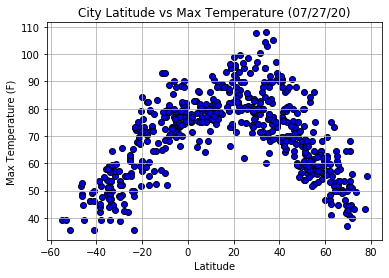

In [15]:
# Build latitude vs max temp scatter plot
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Max Temp"], marker="o", edgecolors="black", c="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (07/27/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Latitude vs. Humidity Plot

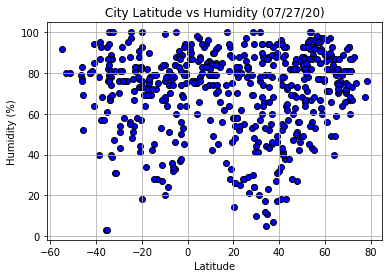

In [16]:
# Build latitude vs humidity scatter plot
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Humidity"], marker="o", edgecolors="black", c="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (07/27/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

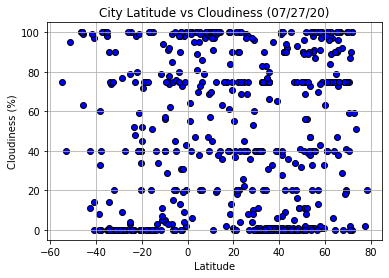

In [17]:
# Build latitude vs cloudiness scatter plot
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Cloudiness"], marker="o", edgecolors="black", c="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (07/27/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

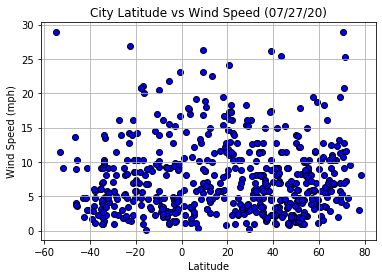

In [18]:
# Build latitude vs wind speed scatter plot
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Wind Speed"], marker="o", edgecolors="black", c="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (07/27/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots

In [20]:
# Create Northern Hemisphere DataFrame
cities_northern_hem=cities_weather_df.loc[cities_weather_df["Lat"]>0]
cities_northern_hem.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,82.40,58,1,8.05,US,1596057323
7,jamestown,42.10,-79.24,75.99,78,90,8.05,US,1596057321
8,srednekolymsk,67.45,153.68,50.38,64,92,10.27,RU,1596057540
12,clyde river,70.47,-68.59,41.00,93,75,11.41,CA,1596057328
18,atar,20.52,-13.05,95.20,26,0,11.07,MR,1596057372


In [21]:
# Create Southern Hemisphere DataFrame
cities_southern_hem=cities_weather_df.loc[cities_weather_df["Lat"]<0]
cities_southern_hem.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,coihaique,-45.58,-72.07,39.20,69,99,3.51,CL,1596057344
2,vaini,-21.20,-175.20,69.80,77,40,16.11,TO,1596057327
3,bambous virieux,-20.34,57.76,72.00,83,40,10.29,MU,1596057387
4,richards bay,-28.78,32.04,65.44,81,77,5.10,ZA,1596057449
5,souillac,-20.52,57.52,71.60,83,40,10.29,MU,1596057363


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48287216031842367


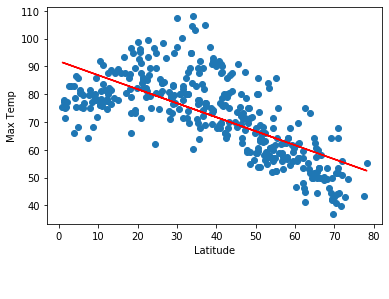

In [22]:
# Calculate the linear regression
x_values=cities_northern_hem["Lat"]
y_values=cities_northern_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("NorthernHem Max Temp v Lat.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6576197246682466


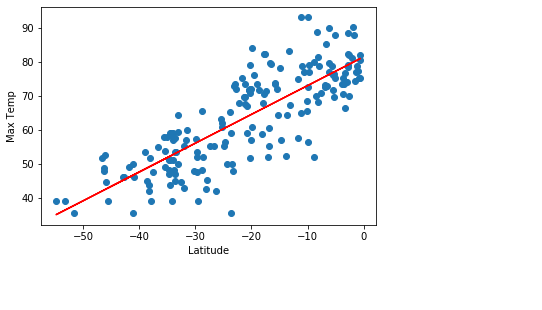

In [23]:
# Calculate the linear regression
x_values=cities_southern_hem["Lat"]
y_values=cities_southern_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("SouthernHem Max Temp v Lat.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004829192238041509


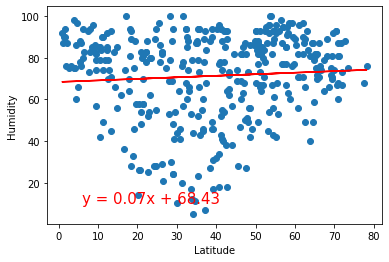

In [24]:
# Calculate the linear regression
x_values=cities_northern_hem["Lat"]
y_values=cities_northern_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("NorthernHem Humidity v Lat.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012777855746262529


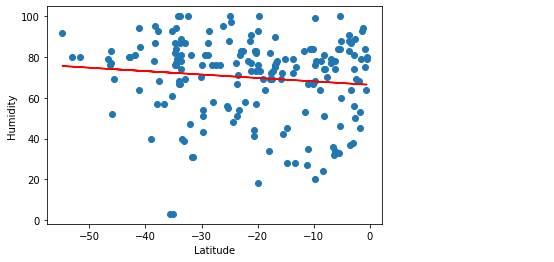

In [25]:
# Calculate the linear regression
x_values=cities_southern_hem["Lat"]
y_values=cities_southern_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("SouthernHem Humidity v Lat.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006779100567918131


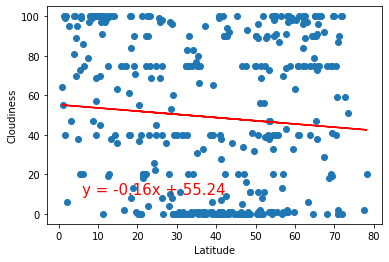

In [26]:
# Calculate the linear regression
x_values=cities_northern_hem["Lat"]
y_values=cities_northern_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("NorthernHem Cloudiness v Lat.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0018297238239394248


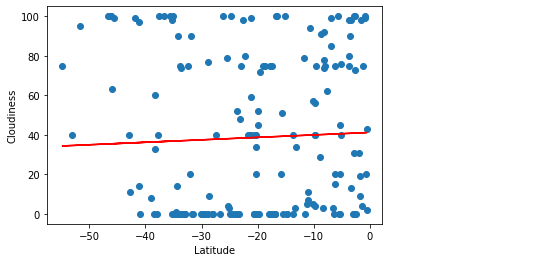

In [27]:
# Calculate the linear regression
x_values=cities_southern_hem["Lat"]
y_values=cities_southern_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("SouthernHem Cloudiness v Lat.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005471737030326711


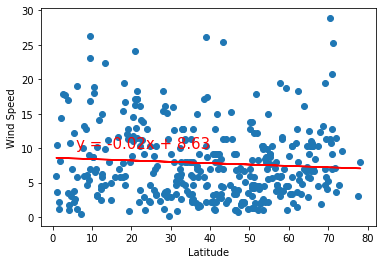

In [28]:
# Calculate the linear regression
x_values=cities_northern_hem["Lat"]
y_values=cities_northern_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("NorthernHem Wind v Lat.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002875085589172633


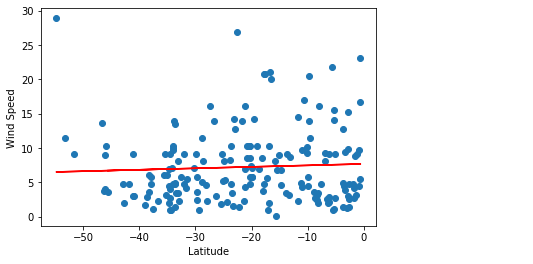

In [29]:
# Calculate the linear regression
x_values=cities_southern_hem["Lat"]
y_values=cities_southern_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("SouthernHem Wind v Lat.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()